# 1.) Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv", header = 0)

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [ ]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [ ]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [ ]:
type(df_select["trans_date_trans_time"][0])

str

In [ ]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

In [ ]:
dir(df_select["trans_date_trans_time"][0])

In [ ]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

In [ ]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [ ]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 5.) Train a Logistic regression.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nt = int(len(X)*0.8)
X_train = scaler.fit_transform(X.iloc[:nt])
X_test = scaler.fit_transform(X.iloc[nt:])
y_train = y.iloc[:nt]
y_test = y.iloc[nt:]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(penalty='none')
log_reg = model.fit(X_train, y_train)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [ ]:
# Get False Positive Rate, True Positive Rate and threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

# Iterate over different threshold values
for th in threshold:
    # Classify samples using the threshold
    y_pred = (y_pred_proba > th).astype(int)
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Calculate the false positive rate
    fpr = cm[0,1] / (cm[0,1] + cm[0,0])
    print("Threshold: {:.6f} FPR: {:.6f}".format(th, fpr))

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Predict probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Get False Positive Rate, True Positive Rate and threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

# Find the threshold at which fpr is closest to 5%
threshold = threshold[np.argmin(np.abs(fpr - 0.05))]

In [ ]:
threshold

0.011064581415990678

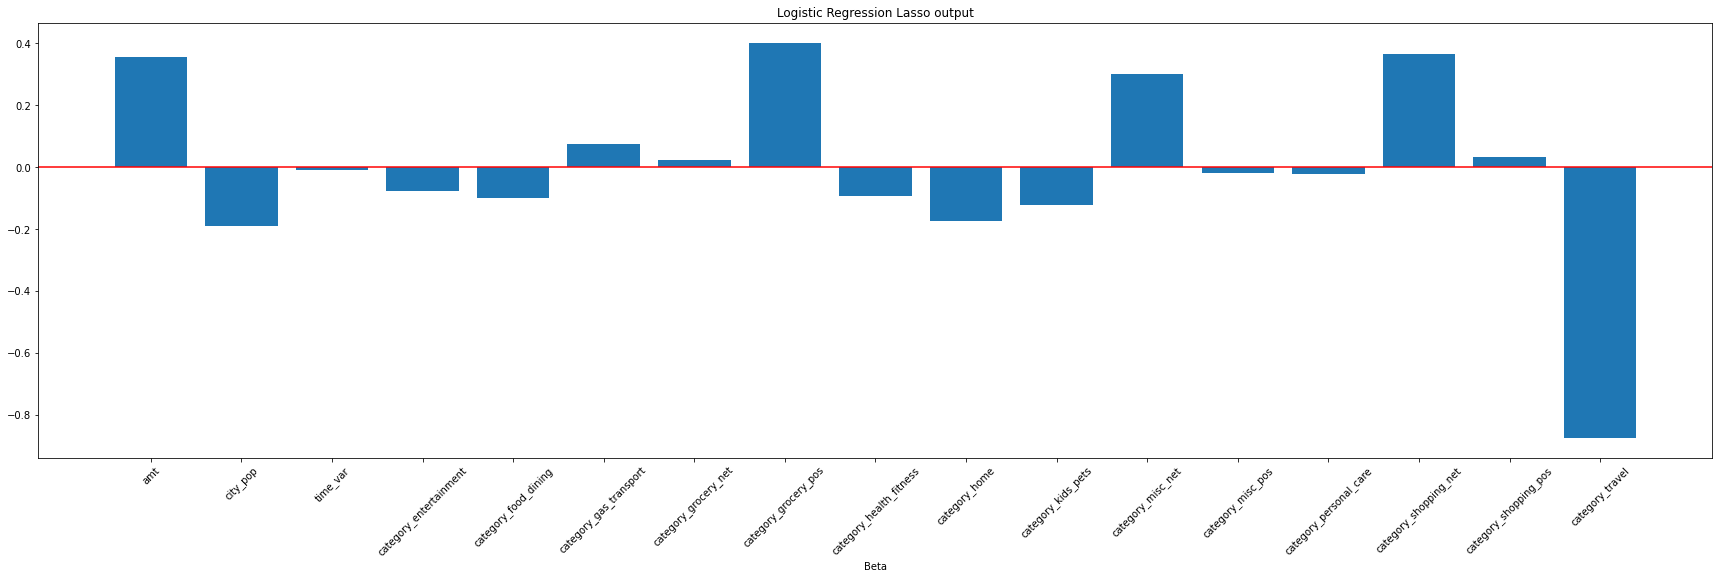

In [ ]:
plt.figure(figsize=(30,8))
plt.bar(X.columns, log_reg.coef_[0])
plt.axhline(y = 0, color = "red")
plt.title("Logistic Regression Lasso output")
plt.xlabel("Beta")
plt.xticks(rotation=45)
plt.show()

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [ ]:
df_temp = df_select.iloc[nt:].copy()

In [ ]:
y_scores = log_reg.decision_function(X_test)

In [ ]:
# Use the threshold we get in the previous question
y_pred = (y_scores > threshold).astype(int)

In [ ]:
df_temp["pred"] = y_pred

In [ ]:
df_temp = df_temp[["pred", "is_fraud", "amt"]]

In [ ]:
df_temp.head()

,pred,is_fraud,amt
444575,0,0,2.01
444576,0,0,163.80
444577,0,0,2.33
444578,0,0,163.97
444579,0,0,9.08


In [ ]:
# Create an empty list to store the results
results = []

# Iterate over the rows of the dataframe
for i, row in df_temp.iterrows():
    # Get the predicted and true values
    predicted = row['pred']
    true = row['is_fraud']

    # Compare the predicted and true values
    if predicted == 1 and true == 1:
      results.append(0.02 * row["amt"])
    elif predicted == 0 and true == 1:
      results.append(-1.0 * row["amt"])
    elif predicted == 1 and true == 0:
      results.append(0.0)
    else:
      results.append(0.0)

# Add the results to the dataframe as a new column
df_temp['result'] = results

In [ ]:
df_temp.result.sum()

-97427.68000000002

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [ ]:
# Create an instance of the LogisticRegression class with Lasso regularization
clf = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)

# Fit the model to the training data
result = clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

In [ ]:
result.coef_[0]

array([ 0.35532401, -0.18881027, -0.00713518, -0.07296524, -0.09663525,
        0.07784607,  0.02374496,  0.40643142, -0.08750455, -0.16760718,
       -0.1173261 ,  0.30389862, -0.01493365, -0.01722057,  0.37071766,
        0.03631603, -0.86081114])

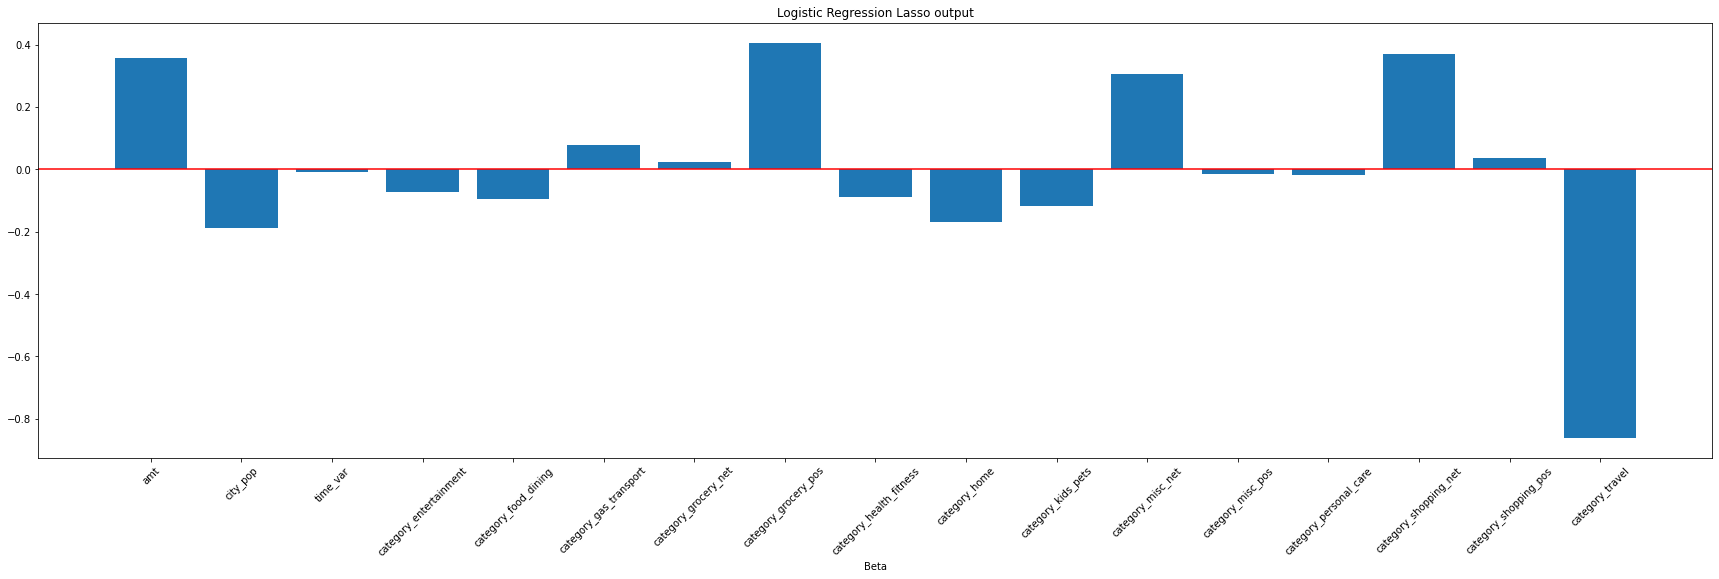

In [ ]:
plt.figure(figsize=(30,8))
plt.bar(X.columns, result.coef_[0])
plt.axhline(y = 0, color = "red")
plt.title("Logistic Regression Lasso output")
plt.xlabel("Beta")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("Score:", result.score(X_test, y_test))

Score: 0.9981105592744548


In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Get False Positive Rate, True Positive Rate and threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

# Find the threshold at which fpr is closest to 5%
threshold = threshold[np.argmin(np.abs(fpr - 0.05))]

In [ ]:
threshold

0.011023357945102593

In [ ]:
df_temp = df_select.iloc[nt:].copy()
y_scores = log_reg.decision_function(X_test)
# Use the threshold we get in the previous question
y_pred = (y_scores > threshold).astype(int)
df_temp["pred"] = y_pred
df_temp = df_temp[["pred", "is_fraud", "amt"]]
df_temp.head()

,pred,is_fraud,amt
444575,0,0,2.01
444576,0,0,163.80
444577,0,0,2.33
444578,0,0,163.97
444579,0,0,9.08


In [ ]:
# Create an empty list to store the results
results = []

# Iterate over the rows of the dataframe
for i, row in df_temp.iterrows():
    # Get the predicted and true values
    predicted = row['pred']
    true = row['is_fraud']

    # Compare the predicted and true values
    if predicted == 1 and true == 1:
      results.append(0.02 * row["amt"])
    elif predicted == 0 and true == 1:
      results.append(-1.0 * row["amt"])
    elif predicted == 1 and true == 0:
      results.append(0.0)
    else:
      results.append(0.0)

# Add the results to the dataframe as a new column
df_temp['result'] = results

In [ ]:
df_temp[df_temp.result == 0.02]

,pred,is_fraud,amt,result


In [ ]:
df_temp.result.sum()

-97427.68000000002

Nothing change, why with and without penalty there is no difference?